## Introduction
### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 

### Load the data
The dataset contains apartment offers from the 15 largest cities in Poland (Warsaw, Lodz, Krakow, Wroclaw, Poznan, Gdansk, Szczecin, Bydgoszcz, Lublin, Katowice, Bialystok, Czestochowa). The data comes from local websites with apartments for sale. To fully capture the neighborhood of each apartment better, each offer was extended by data from the Open Street Map with distances to points of interest (POI). The data is collected monthly and covers timespan between August 2023 and November 2023

Variables Description:

- city - the name of the city where the property is located
- type - type of the building
- squareMeters - the size of the apartment in square meters
- rooms - number of rooms in the apartment
- floor / floorCount - the floor where the apartment is located and the total number of floors in the building
- buildYear - the year when the building was built
- latitude, longitude - geo coordinate of the property
- centreDistance - distance from the city centre in km
- poiCount - number of points of interest in 500m range from the apartment (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)
- [poiName]Distance - distance to the nearest point of interest (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)
- ownership - the type of property ownership
- condition - the condition of the apartment
- has[features] - whether the property has key features such as assigned parking space, balcony, elevator, security, storage room
- price - offer price in Polish Zloty

https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data


In [2]:
df_2023_08 = pd.read_csv('file/apartments_pl_2023_08.csv')
df_2023_08['month'] = 8
#df_2023_08['year'] = 2023
df_2023_09 = pd.read_csv('file/apartments_pl_2023_09.csv')
df_2023_09['month'] = 9
#df_2023_09['year'] = 2023
df_2023_10 = pd.read_csv('file/apartments_pl_2023_10.csv')
df_2023_10['month'] = 10
#df_2023_10['year'] = 2023
df_2023_11 = pd.read_csv('file/apartments_pl_2023_11.csv')
df_2023_11['month'] = 11
#df_2023_11['year'] = 2023

## Data analize 

In [3]:
df_2023_08.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000,8
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995,8
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000,8
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000,8
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no,759000,8


In [4]:
df_2023_09.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,71de9eb8a92ac12d7c94315228b70cfb,szczecin,tenement,123.45,4.0,2.0,3.0,NaN,53.432586,14.535685,1.96,46.0,0.138,0.410,0.113,0.367,0.073,0.388,0.321,condominium,brick,NaN,no,yes,no,no,yes,799000,9
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,0.79,60.0,0.147,0.437,0.328,0.198,0.009,0.465,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000,9
2,3b8819c6c9ffd55adfddfd5bafcc844d,szczecin,tenement,50.00,2.0,NaN,1.0,NaN,53.364400,14.660900,9.32,6.0,0.367,1.368,0.377,0.273,0.367,NaN,0.399,condominium,brick,NaN,yes,no,no,no,no,350000,9
3,708ccd264180315a4cfe6324ed4861d0,szczecin,blockOfFlats,55.19,2.0,1.0,2.0,2013.0,53.480364,14.541494,6.46,2.0,1.570,2.879,1.236,0.803,0.374,3.138,0.183,condominium,brick,premium,yes,yes,no,yes,yes,607000,9
4,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000,9


In [5]:
df_2023_10.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,0.79,60.0,0.147,0.437,0.328,0.198,0.009,0.465,0.073,cooperative,NaN,NaN,no,no,yes,no,no,420000,10
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000,10
2,ede1c0d953ff85f3cd9676d39ca8f62d,szczecin,blockOfFlats,37.00,2.0,8.0,10.0,1970.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,yes,yes,429995,10
3,6c807c6c86a74c57a3fd4445a1f49a46,szczecin,apartmentBuilding,48.00,2.0,4.0,6.0,NaN,53.435461,14.570436,1.48,14.0,0.293,1.009,0.283,0.426,0.176,0.895,0.177,condominium,brick,NaN,no,yes,no,no,no,550000,10
4,bb14c9a540275da73f6cb6ed42e5c26c,szczecin,apartmentBuilding,55.19,2.0,1.0,2.0,2013.0,53.482094,14.542574,6.64,2.0,1.769,2.783,1.394,0.944,0.172,3.209,0.043,condominium,brick,premium,yes,yes,no,yes,yes,607000,10


In [6]:
df_2023_11.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
0,0d9b89891919809b6465f1f8bd942c62,szczecin,blockOfFlats,82.20,4.0,3.0,4.0,1981.0,53.451900,14.560600,3.17,18.0,0.373,0.257,0.252,0.139,0.189,1.684,0.197,condominium,concreteSlab,NaN,yes,no,no,no,yes,669000,11
1,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,650000,11
2,546fbb3c9042fc833149173fc6a2240f,szczecin,blockOfFlats,28.13,1.0,NaN,5.0,1965.0,53.427312,14.549056,0.90,78.0,0.474,0.034,0.138,0.363,0.067,0.436,0.111,condominium,brick,NaN,no,no,no,no,yes,319500,11
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,3.94,7.0,0.139,1.336,0.926,0.930,0.071,0.786,0.304,condominium,brick,NaN,no,yes,no,no,yes,550000,11
4,7ec72a2301d950ae17926c3c1e67a0ed,szczecin,tenement,35.92,2.0,NaN,NaN,NaN,53.424203,14.543550,1.16,34.0,0.217,0.374,0.145,0.252,0.201,0.578,0.329,condominium,brick,low,yes,no,no,no,no,299000,11


### Dividing the data into training and testing parts. The training part is the period from 08/2023 to 10/2023 and the test part is the month of 11/2023

In [7]:
frames = [df_2023_08 ,df_2023_09, df_2023_10]
df_train = pd.concat(frames)
df_test = df_2023_11

In [8]:
df_train.shape

(52592, 29)

In [9]:
df_train.dtypes

id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
buildingMaterial         object
condition                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                     int64
month                     int64
dtype: object

In [10]:
df_train.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price,month
count,52592.000000,52592.000000,43065.000000,51842.000000,43467.000000,52592.000000,52592.000000,52592.000000,52592.000000,52542.000000,52340.000000,52519.000000,52543.000000,52438.000000,51020.000000,52513.000000,5.259200e+04,52592.000000
mean,58.830142,2.681929,3.313108,5.229004,1984.493961,52.043787,19.511684,4.359606,20.294417,0.417065,0.989992,0.522876,0.375328,0.357714,1.452446,0.366438,7.074146e+05,8.957883
std,21.250642,0.910070,2.514338,3.283571,33.981805,1.339533,1.779307,2.876144,23.765901,0.478467,0.910303,0.512821,0.460811,0.482326,1.105774,0.476065,3.495542e+05,0.821616
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,1.500000e+05,8.000000
25%,44.360000,2.000000,2.000000,3.000000,1965.000000,51.114060,18.527700,2.010000,7.000000,0.175000,0.360000,0.238000,0.158000,0.117000,0.587000,0.145000,4.680000e+05,8.000000
50%,55.000000,3.000000,3.000000,4.000000,1991.000000,52.195252,19.902880,3.960000,13.000000,0.290000,0.685000,0.390000,0.266000,0.235000,1.124000,0.240000,6.390000e+05,9.000000
75%,69.000000,3.000000,4.000000,6.000000,2014.000000,52.436800,20.994660,6.140000,24.000000,0.468000,1.270000,0.628000,0.420000,0.418000,2.076000,0.407000,8.500000e+05,10.000000
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,5.000000,4.992000,2.500000e+06,10.000000


In [11]:
# Checking for missing values
df_train.isna().sum()

id                          0
city                        0
type                    11650
squareMeters                0
rooms                       0
floor                    9527
floorCount                750
buildYear                9125
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             50
clinicDistance            252
postOfficeDistance         73
kindergartenDistance       49
restaurantDistance        154
collegeDistance          1572
pharmacyDistance           79
ownership                   0
buildingMaterial        20505
condition               39819
hasParkingSpace             0
hasBalcony                  0
hasElevator              2688
hasSecurity                 0
hasStorageRoom              0
price                       0
month                       0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52592 entries, 0 to 16689
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52592 non-null  object 
 1   city                  52592 non-null  object 
 2   type                  40942 non-null  object 
 3   squareMeters          52592 non-null  float64
 4   rooms                 52592 non-null  float64
 5   floor                 43065 non-null  float64
 6   floorCount            51842 non-null  float64
 7   buildYear             43467 non-null  float64
 8   latitude              52592 non-null  float64
 9   longitude             52592 non-null  float64
 10  centreDistance        52592 non-null  float64
 11  poiCount              52592 non-null  float64
 12  schoolDistance        52542 non-null  float64
 13  clinicDistance        52340 non-null  float64
 14  postOfficeDistance    52519 non-null  float64
 15  kindergartenDistanc

In [13]:
nulls_summary = pd.DataFrame(df_train.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df_train.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df_train.isnull().mean()*100),2)
print(nulls_summary.sort_values(by=['Num_of_nulls [%]'], ascending=False))

                      Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
condition              True               39819             75.71
buildingMaterial       True               20505             38.99
type                   True               11650             22.15
floor                  True                9527             18.11
buildYear              True                9125             17.35
hasElevator            True                2688              5.11
collegeDistance        True                1572              2.99
floorCount             True                 750              1.43
clinicDistance         True                 252              0.48
restaurantDistance     True                 154              0.29
pharmacyDistance       True                  79              0.15
postOfficeDistance     True                  73              0.14
schoolDistance         True                  50              0.10
kindergartenDistance   True                  49              0.09
hasParking

### Data Visualization

In [14]:
def percent_formatter(x, pos):
        return str(round(x*100)) + "%"
    
def my_gap_analysis(df_train):
    allCols = df_train.columns
    nonEmpty = []
    barColors = []
    for colName in allCols:
      completeness = 1-len(df_train[df_train[colName].isnull()])/len(df_train)
      nonEmpty.append(completeness)
      if(completeness == 1):
         barColors.append('green')
      elif completeness < 0.75:
        barColors.append('red')
      else:
         barColors.append('yellow')

    fig, axs = plt.subplots(figsize=(10, 7))
    axs.set_title("Data completeness [%]")
    axs.barh(allCols, nonEmpty, color=barColors)
    axs.set_xlim(0, 1)
    axs.xaxis.set_major_formatter(percent_formatter)
    plt.show()
    return

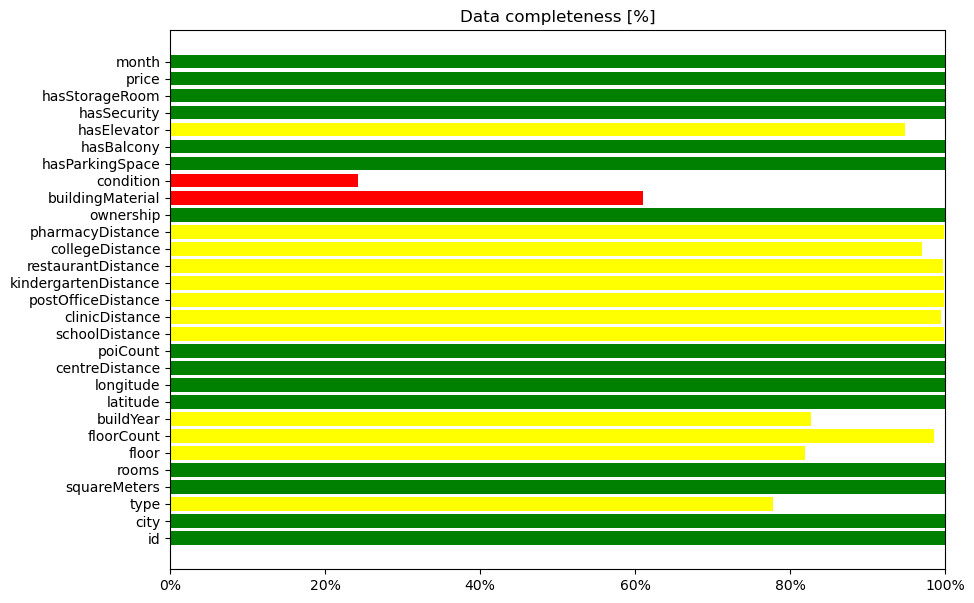

In [15]:
my_gap_analysis(df_train)

In [16]:

df_type = df_train["city"].value_counts(dropna=False)
print(df_type)


warszawa       15465
krakow          7623
gdansk          5211
wroclaw         4967
lodz            4285
bydgoszcz       2793
gdynia          2323
poznan          2163
lublin          1823
szczecin        1541
katowice        1452
radom            960
bialystok        828
czestochowa      606
rzeszow          552
Name: city, dtype: int64


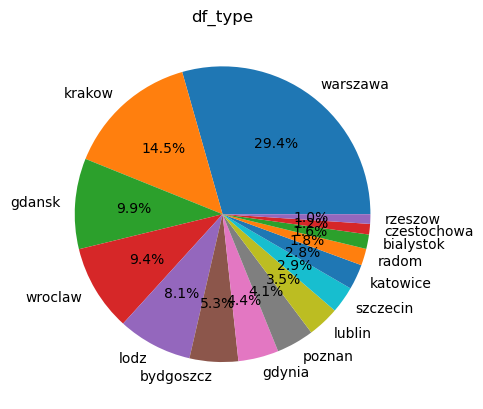

In [17]:
figure, axe = plt.subplots()
axe.set_title('df_type')
axe.pie(df_type,labels = df_type.index, autopct='%1.1f%%')
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
def my_correlation_analysis(df_train):
    plt.figure(figsize=(14,8))
    sns.set_theme(style="white")
    corr = df_train.corr()
    heatmap = sns.heatmap(corr, annot=True, cmap="RdBu", fmt='.1g')
    return


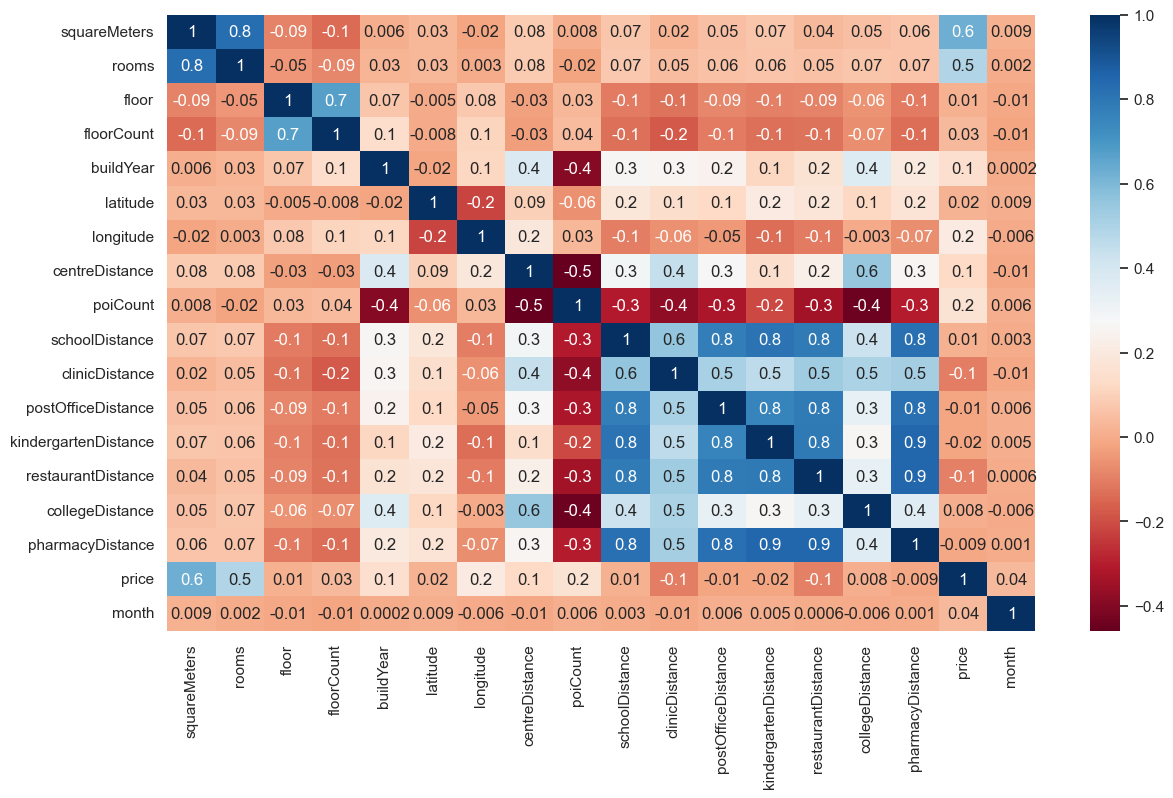

In [19]:
my_correlation_analysis(df_train)

In [20]:
df_train.corr()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price,month
squareMeters,1.000000,0.825630,-0.089380,-0.139885,0.006064,0.029229,-0.018714,0.081179,0.007529,0.070948,0.021977,0.054224,0.067905,0.036288,0.052100,0.061362,0.626393,0.009412
rooms,0.825630,1.000000,-0.050976,-0.085160,0.025595,0.027614,0.002629,0.077540,-0.022270,0.072444,0.045404,0.057283,0.063937,0.054452,0.066786,0.065010,0.487640,0.001767
floor,-0.089380,-0.050976,1.000000,0.675275,0.071053,-0.005439,0.076188,-0.026203,0.030665,-0.107864,-0.127424,-0.086642,-0.096464,-0.091813,-0.056965,-0.106266,0.009771,-0.011565
floorCount,-0.139885,-0.085160,0.675275,1.000000,0.135097,-0.007823,0.109032,-0.034675,0.037762,-0.132805,-0.175261,-0.110666,-0.129057,-0.124299,-0.070720,-0.133678,0.032466,-0.014559
buildYear,0.006064,0.025595,0.071053,0.135097,1.000000,-0.017194,0.111745,0.377782,-0.390033,0.259634,0.258521,0.237646,0.115520,0.166893,0.369545,0.198908,0.148710,0.000173
latitude,0.029229,0.027614,-0.005439,-0.007823,-0.017194,1.000000,-0.223497,0.094719,-0.060640,0.181728,0.140510,0.126896,0.203298,0.175896,0.120970,0.169825,0.015007,0.008681
longitude,-0.018714,0.002629,0.076188,0.109032,0.111745,-0.223497,1.000000,0.185761,0.026463,-0.099714,-0.062934,-0.047465,-0.139146,-0.110036,-0.003408,-0.067433,0.207921,-0.006074
centreDistance,0.081179,0.077540,-0.026203,-0.034675,0.377782,0.094719,0.185761,1.000000,-0.458212,0.290941,0.446569,0.268868,0.143950,0.227777,0.550507,0.259395,0.124769,-0.010107
poiCount,0.007529,-0.022270,0.030665,0.037762,-0.390033,-0.060640,0.026463,-0.458212,1.000000,-0.306729,-0.377417,-0.323825,-0.211471,-0.343584,-0.442041,-0.302563,0.167207,0.006324
schoolDistance,0.070948,0.072444,-0.107864,-0.132805,0.259634,0.181728,-0.099714,0.290941,-0.306729,1.000000,0.558783,0.773332,0.807911,0.785056,0.425533,0.822711,0.012585,0.002611


## Data clearing


### Drop duplicates and reset index


In [21]:
df_train = df_train.drop_duplicates().reset_index(drop=True)

### Filling in missing data

The data guessing strategy involves filling in missing data with predictions using available information. In cases where predicting missing cells involved significant risk, the column was omitted. The decision to remove a column was made independently depending on which option retained more data, ensuring a comprehensive dataset.

In [22]:
np.random.seed(2000)

#### Filling in the gaps in the columns Distance in the base with the 'centreDistance' column


In [23]:
def partial(lst, query):
    return list(filter(lambda x: query in x, lst))
list_dist = partial(df_train.columns.values, 'Distance')
sort_by_value = 'centreDistance' 
work_list_dist=list_dist.remove(sort_by_value) 
full_df_finish = 0 

In [24]:
for column_being_completed in list_dist:
    
    if (full_df_finish == 0):
        working_df = df_train[df_train[column_being_completed].isna()].copy(deep=False)  
        not_working_df = df_train.drop(working_df.index)  
        full_df_finish = 1
    else:
        working_df = full_df[full_df[column_being_completed].isna()].copy(deep=False)  
        not_working_df = full_df.drop(working_df.index)  
        
    sort_working_df = working_df.sort_values(by=['city'])

    index_sort_working_df = sort_working_df['centreDistance'].index
    
    search_city = 'zero'
    name_column_to_part = 'city'
    new_working_df = pd.DataFrame(columns=[working_df.columns]) 
    empty_new_working_df = 1  

    for one_index_sort_working_df in index_sort_working_df:
        if (search_city != working_df[name_column_to_part][one_index_sort_working_df]):
            search_city = working_df[name_column_to_part][one_index_sort_working_df] 
            base_for_replenishment_df = not_working_df[not_working_df[name_column_to_part] == search_city].copy() 
            city_work_df1 = working_df[working_df[name_column_to_part]== search_city].copy() 
            drop_column = [] 
            nan_in_column = [sort_by_value, column_being_completed]
            for name_column in city_work_df1.columns:
                if ((name_column != nan_in_column[0]) and (name_column != nan_in_column[1]) ): 
                    drop_column.append(name_column)
            df_write = city_work_df1.sort_values(nan_in_column[0])
            df_reindex_write = df_write.drop(columns=drop_column).reindex(columns=nan_in_column) 
            df_read = base_for_replenishment_df.sort_values(nan_in_column[0]) 
            df_reindex_read = df_read.drop(columns=drop_column).reindex(columns=nan_in_column)
            search_column_values = pd.merge_asof(
                df_reindex_write,
                df_reindex_read,
                on=nan_in_column[0],
                direction="nearest" ) 
            index_search_column_values = [nan_in_column[1]+'_y'] 
            one_column = search_column_values[index_search_column_values].rename(columns={index_search_column_values[0]: nan_in_column[1]})
            df_write_index = df_write.reset_index().drop(nan_in_column[1], axis=1) 
            df_robocze = pd.merge(df_write_index, one_column, left_index=True, right_index=True)

            if (empty_new_working_df == 1):
                new_working_df = df_robocze.copy() 
                empty_new_working_df = 0
            else:
                new_working_df = pd.concat([new_working_df, df_robocze]) 
                
    to_merge_new_working_df = new_working_df.drop(columns=new_working_df.columns[0]).reindex(columns=not_working_df.columns) # usunięcie kolumny z indeksem
    full_df = pd.concat([not_working_df, to_merge_new_working_df]).reset_index(drop=True)


In [25]:

# remove low conditions apartments. focus on mainstream
full_df = full_df[full_df['condition'] != 'low']

# remove cooperative since it is uncommon
full_df = full_df[full_df['ownership'] != 'cooperative']

# tenements were built between 1875 and 1975
full_df['buildYear'] = full_df.apply(lambda x: round(np.random.normal(loc=1925, scale=25)) if (pd.isna(x['buildYear']) and  x['type'] == 'tenement') else x['buildYear'], axis=1)
# apartments were build after 2000
full_df['buildYear'] = full_df.apply(lambda x: (2023 - round(abs(np.random.normal(loc=0, scale=15)))) if (pd.isna(x['buildYear']) and  x['type'] == 'apartmentBuilding') else x['buildYear'], axis=1)
# tenement has been built before 1960
full_df['type'] = full_df.apply(lambda x: 'tenement' if (pd.isna(x['type']) and  x['buildYear'] < 1960) else x['type'], axis=1)
# block of flats has been built between 1960 and 2000
full_df['type'] = full_df.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['buildYear'] < 2000) else x['type'], axis=1)
# cooperative apartments are usually block of flats
full_df['type'] = full_df.apply(lambda x: 'blockOfFlats' if (pd.isna(x['type']) and  x['ownership'] == 'cooperative') else x['type'], axis=1)
# after 2000 a mix of block of flats and apartment buildings has been built
full_df['type'] = full_df.apply(lambda x: ('blockOfFlats' if(np.random.randint(0, 2) == 0) else 'apartmentBuilding') if (pd.isna(x['type'])) else x['type'], axis=1)
# between 1960 and 1980 concrete slabs were used often. otherwise it was brick
full_df['buildingMaterial'] = full_df.apply(lambda x: 'concreteSlab' if (pd.isna(x['buildingMaterial']) and x['buildYear'] >= 1960 and x['buildYear'] <= 1980) else x['buildingMaterial'], axis=1)
full_df['buildingMaterial'] = full_df.apply(lambda x: 'brick' if pd.isna(x['buildingMaterial']) else x['buildingMaterial'], axis=1)
# most popular buildings are 4 floors height
full_df['floorCount'] = full_df.apply(lambda x: max(x['floor'], 4) if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
full_df['floorCount'] = full_df.apply(lambda x: 4 if pd.isna(x['floorCount']) else x['floorCount'], axis=1)
# apartments are equally distributed across all floors
full_df['floor'] = full_df.apply(lambda x: np.random.randint(1, x['floorCount']+1) if pd.isna(x['floor']) else x['floor'], axis=1)
# usually elevator is installed in 4+ floor buildings
full_df['hasElevator'] = full_df.apply(lambda x: 'no' if (pd.isna(x['hasElevator']) and x['floorCount'] <= 4) else x['hasElevator'], axis=1)
full_df['hasElevator'] = full_df.apply(lambda x: 'yes' if (pd.isna(x['hasElevator']) and x['floorCount'] > 4) else x['hasElevator'], axis=1)

# drop irrelevant columns
full_df = full_df.drop(['condition', 'longitude', 'latitude', 'ownership'], axis=1)

for col in full_df.columns:
    full_df = full_df[full_df[col].isnull() == False]


In [26]:
full_df.isna().sum()

id                      0
city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
buildingMaterial        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
month                   0
dtype: int64

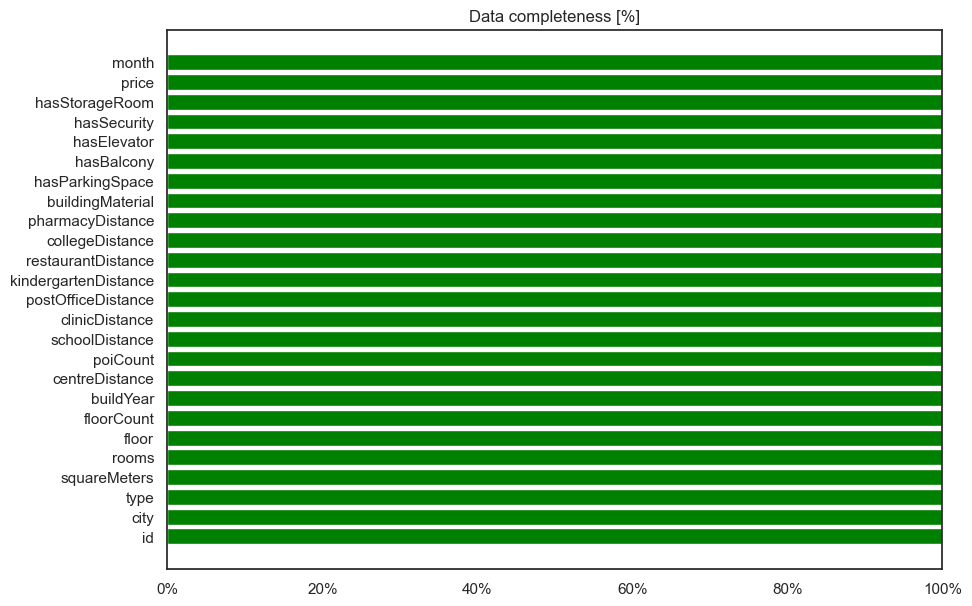

In [27]:
my_gap_analysis(full_df)

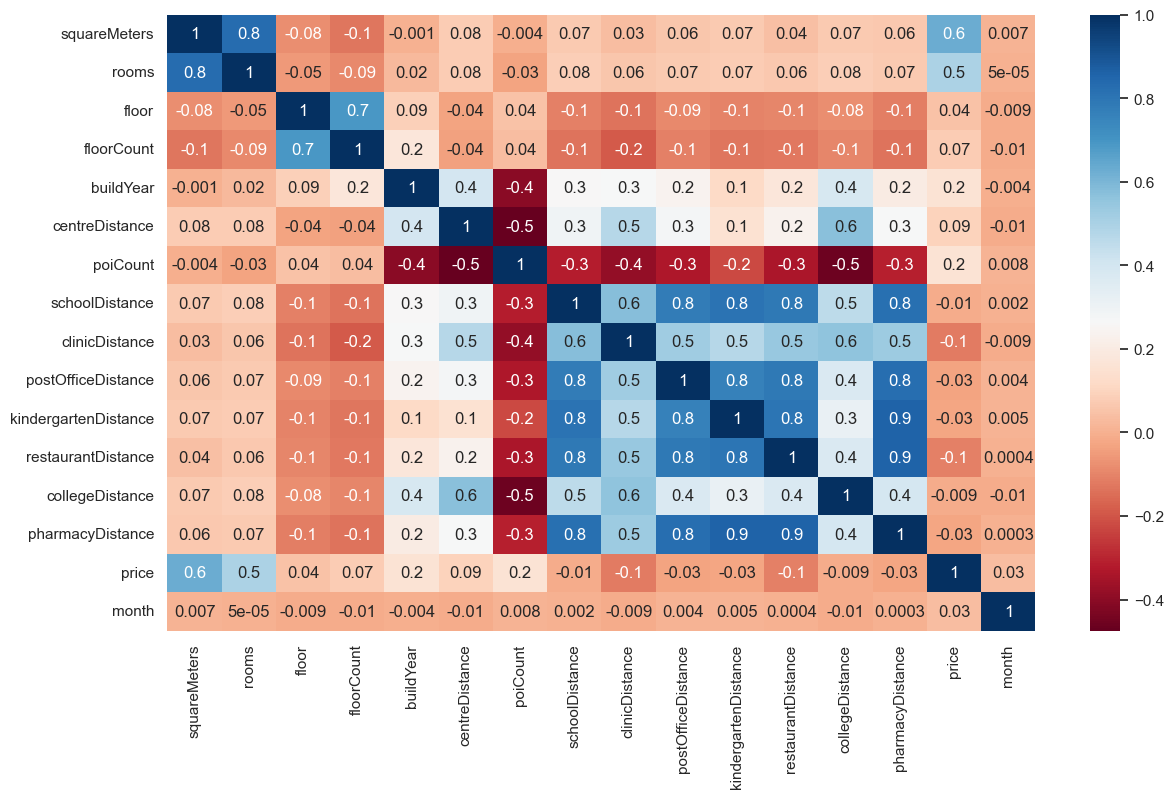

In [28]:
my_correlation_analysis(full_df)

### Unnecessary columns, remove id column

In [29]:
full_df.drop(columns=["id"], inplace=True)

In [30]:
full_df.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,month
1,szczecin,tenement,73.02,3.0,2.0,3.0,1968.0,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,brick,no,no,no,no,no,565000,8
2,szczecin,tenement,87.60,3.0,2.0,3.0,1972.0,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,brick,yes,yes,no,no,yes,640000,8
6,szczecin,apartmentBuilding,60.08,2.0,3.0,4.0,2009.0,3.53,8.0,0.572,0.784,0.305,0.435,0.257,1.945,0.155,brick,no,yes,yes,no,no,629000,8
7,szczecin,blockOfFlats,47.76,2.0,8.0,12.0,1980.0,4.27,6.0,0.345,0.520,0.336,0.500,0.265,1.879,0.420,concreteSlab,no,yes,yes,no,yes,399000,8
9,szczecin,tenement,78.71,4.0,4.0,4.0,1930.0,2.75,13.0,0.321,0.734,0.648,0.386,0.053,1.466,0.208,brick,no,no,no,no,no,549000,8


### Locate categorical variables, we can assume that categorical columns are those in which the number of unique values  is not more than 10. Among them, find those that have a gini coefficient greater than 0.6 and remove them from the set. (Gini index)

In [31]:
def gini(array):
    array = np.array(array).flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array = array + 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [32]:
cat_columns = [col for col in full_df.columns if full_df[col].nunique() < 11]
high_gini_cat_columns = [col for col in cat_columns if gini(full_df[col].value_counts().values) > 0.6]
full_df.drop(columns=high_gini_cat_columns, inplace=True)

### Remove numeric columns for which the absolute value of correlation with the target is less than 0.1

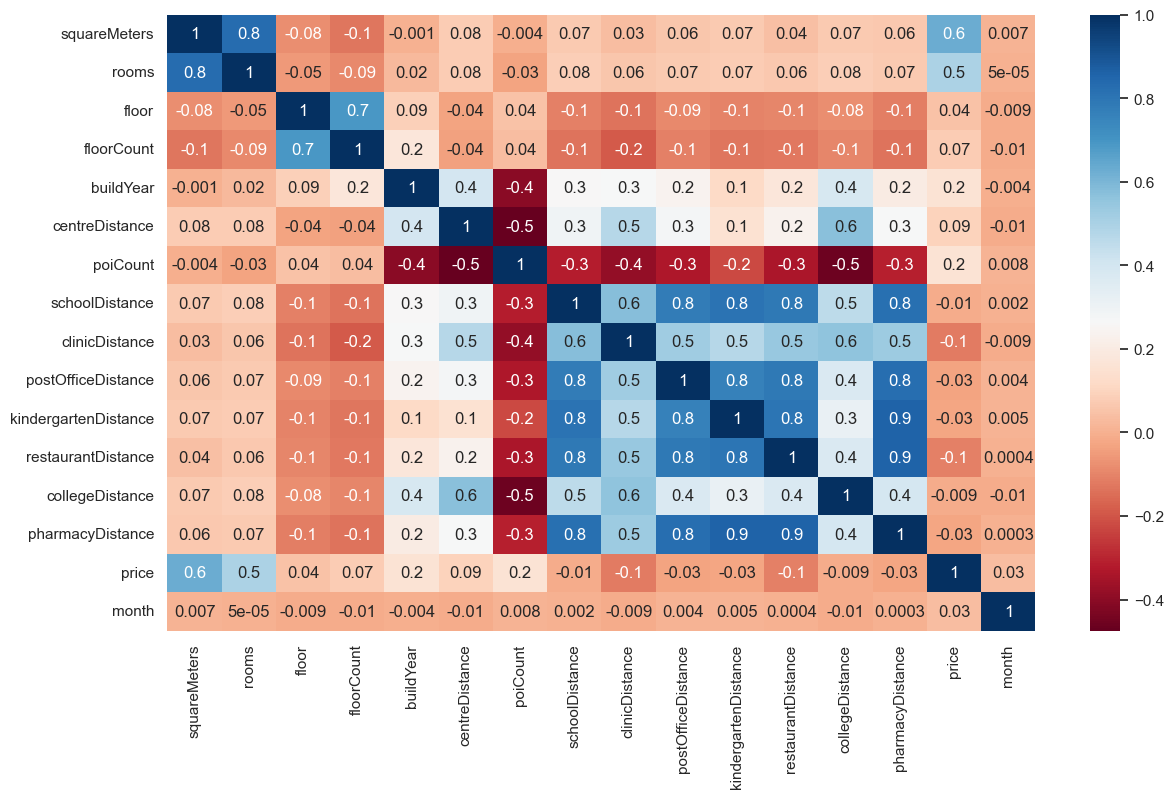

In [33]:
my_correlation_analysis(full_df)

In [34]:
columns_to_drop = (c:= np.abs(full_df.corr()["price"]).sort_values(ascending=False))[c < 0.10].index

In [35]:
full_df.drop(columns=columns_to_drop, inplace=True)

In [36]:
full_df.isna().sum()

city                  0
type                  0
squareMeters          0
rooms                 0
buildYear             0
poiCount              0
clinicDistance        0
restaurantDistance    0
buildingMaterial      0
hasParkingSpace       0
hasBalcony            0
hasElevator           0
hasSecurity           0
hasStorageRoom        0
price                 0
dtype: int64

### Remove outliers using z-score criteria

In [37]:
zscore_df = np.abs(full_df.select_dtypes([int, float]).apply(zscore))
z = zscore_df.apply(lambda x: x < 3)
zsum = z.sum(axis=1)
full_df = full_df[zsum == len(z.columns)]
full_df[full_df.columns] = full_df[full_df.columns].apply(LabelEncoder().fit_transform)

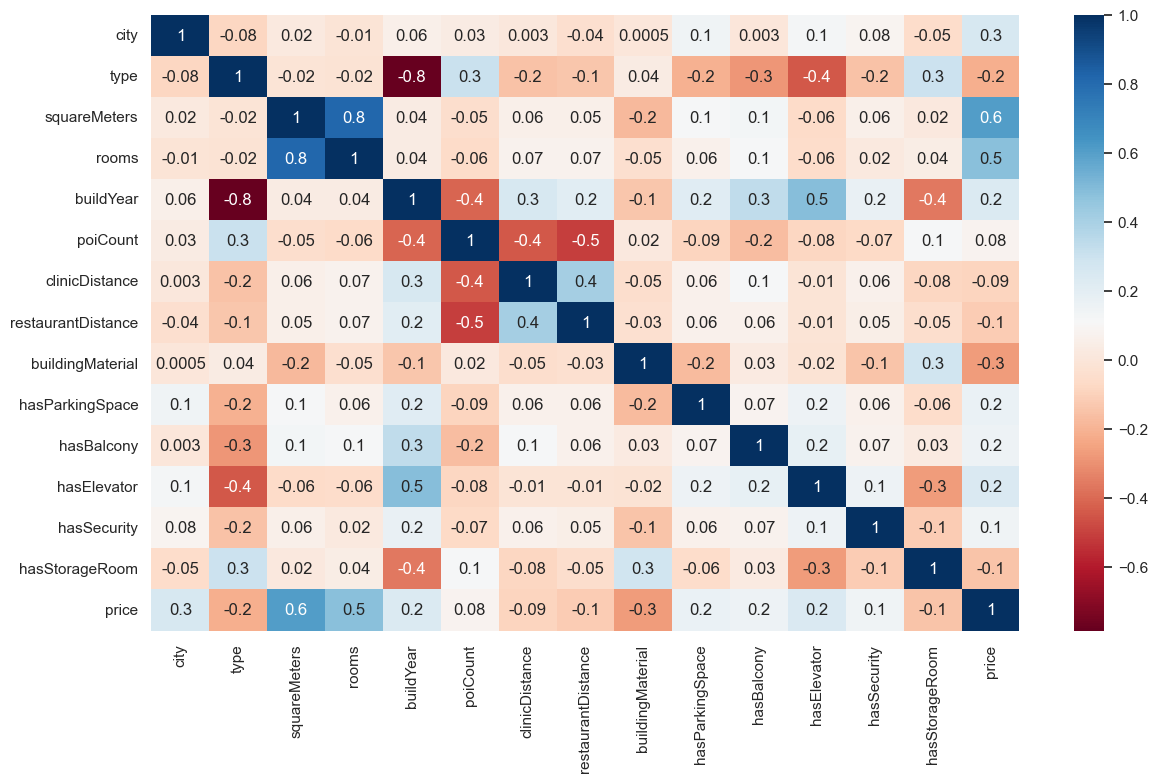

In [38]:
my_correlation_analysis(full_df)

## Hyperparameter modeling and optimization

### Using Random Forest Classifier to Check the Most Important Features

In [39]:
X = full_df.loc[:, full_df.columns != 'price']
y = full_df['price'].values

In [40]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=9, n_jobs=-1)

clf.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10, n_jobs=-1, random_state=0)

In [41]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

squareMeters          0.181588
clinicDistance        0.143822
buildYear             0.118998
restaurantDistance    0.116603
poiCount              0.113283
city                  0.108367
rooms                 0.051979
hasBalcony            0.034739
hasElevator           0.028603
hasStorageRoom        0.025122
type                  0.024896
hasParkingSpace       0.023032
hasSecurity           0.014573
buildingMaterial      0.014394
dtype: float64

<BarContainer object of 14 artists>

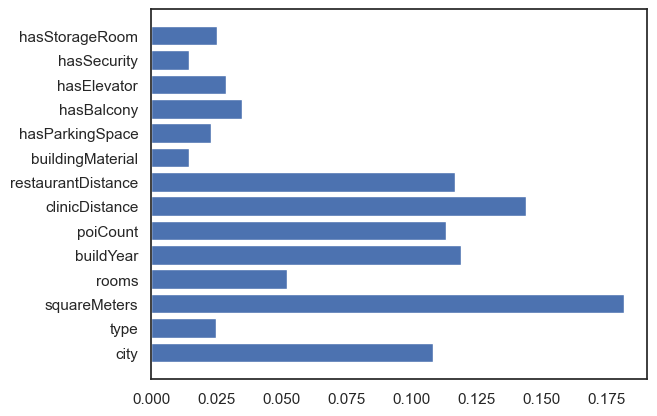

In [42]:
plt.barh(X.columns, clf.feature_importances_)

## Klasyfikacja

### Regresja logistyczna

In [43]:
full_df.head()

,city,type,squareMeters,rooms,buildYear,poiCount,clinicDistance,restaurantDistance,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
1,12,2,3191,2,92,9,667,299,0,0,0,0,0,0,1060
2,12,2,3768,2,96,32,254,100,0,1,1,0,0,1,1369
6,12,0,2351,1,133,8,779,256,0,0,1,1,0,0,1316
7,12,1,1428,1,104,6,515,264,1,0,1,1,0,1,484
9,12,2,3462,3,54,13,729,52,0,0,0,0,0,0,1002


In [44]:
#Wybieranie potrzebnych kolumn
df_test_OK = df_test[full_df.columns]

In [45]:
column_list =  df_test_OK.select_dtypes("object").columns
column_list

Index(['city', 'type', 'buildingMaterial', 'hasParkingSpace', 'hasBalcony',
       'hasElevator', 'hasSecurity', 'hasStorageRoom'],
      dtype='object')

In [46]:
# tu może być błąd w składni
df_test_OK[column_list] = df_test_OK[column_list].apply(LabelEncoder().fit_transform)


C:\Users\Geniusz\AppData\Local\Temp\ipykernel_13468\1569436979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_OK[column_list] = df_test_OK[column_list].apply(LabelEncoder().fit_transform)


In [47]:
# Rows with NaN Values
list_NAN = df_test_OK.columns[df_test_OK.isna().any()].tolist()

In [48]:
# Pandas Drop Rows with NaN Values in DataFrame
df_test_OK = df_test_OK.dropna(subset=list_NAN).reset_index(drop=True)

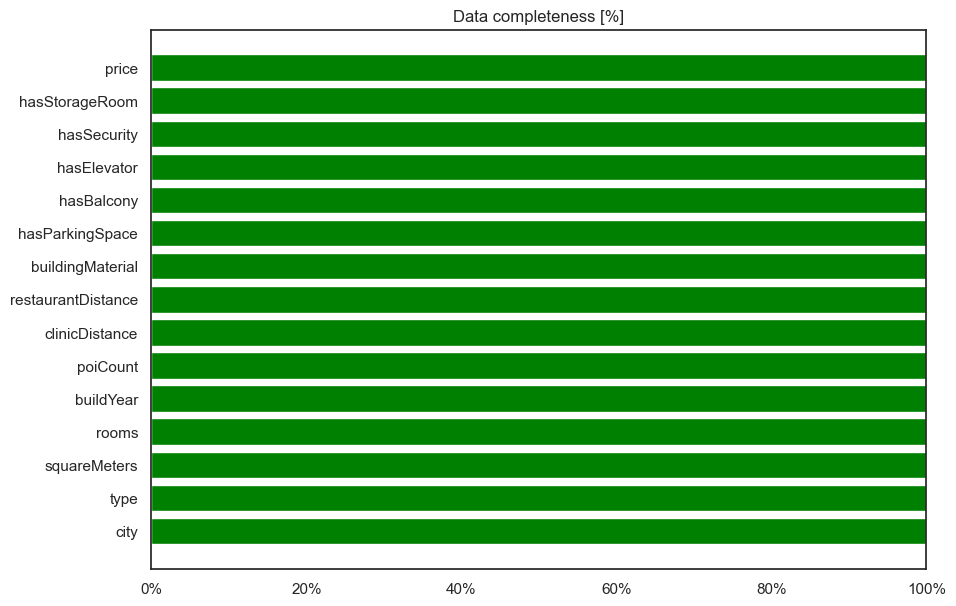

In [49]:
# analysis gap
my_gap_analysis(df_test_OK)

In [50]:
scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(full_df)
X1_test_scaled = scaler.transform(df_test_OK) 

In [51]:
X_train, y_train = full_df.drop(columns=["price"]), full_df["price"]
X_test, y_test = df_test_OK.drop(columns=["price"]), df_test_OK["price"]

In [52]:
model = linear_model.LinearRegression()
model_LR1 = model.fit(X1_train_scaled, y_train)
prediction = model.predict(X1_test_scaled)
r2_calc = r2_score(y_test, prediction)
print(f'For Linear Regression the R2 score is: ', r2_calc)

For Linear Regression the R2 score is:  1.0


In [53]:

#for work_fit_intercept in [True , False]:
#    model = linear_model.LinearRegression(fit_intercept = work_fit_intercept)
#    model_LR1 = model.fit(X1_train_scaled, y_train)
#    prediction = model.predict(X1_test_scaled)
#    r2_calc = r2_score(y_test, prediction)
#    print(f'For fit_intercept = {work_fit_intercept} the R2 score is: ', r2_calc)

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. For fit_intercept = True the value is correct, but fit_intercept = False the value is not in the range 0-1. Data is not centeredIt can be referred that 57% of the changeability of the dependent output attribute can be explained by the model while the remaining 43 % of the variability is still unaccounted for.

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
X = full_df.loc[:, full_df.columns != 'price']
y = full_df['price'].values

In [56]:
model = RandomForestRegressor()
model.fit(X1_train_scaled, y_train)
prediction = model.predict(X1_test_scaled)
RFR_calc = r2_score(y_test, prediction)
print(f'For Random Forest Regressor the R2 score is: ', RFR_calc)

For Random Forest Regressor the R2 score is:  -4.627648588198645


Finding the best n_estimator

In [57]:
#N_estimators = [5,10,20,50,100,200,500]
#RFR_R2_score = []
#for n_estimator in N_estimators:
#    model = RandomForestRegressor(n_estimators = n_estimator, max_depth=7)
#    model.fit(X1_train_scaled, y_train)
#    prediction = model.predict(X1_test_scaled)
#    RFR_calc = r2_score(y_test , prediction)
#    RFR_R2_score.append(RFR_calc)
#    print(f'For {n_estimator} n_estimator the R2 score is: ', RFR_calc)
    


In [58]:
#fig, ax = plt.subplots()
#ax.plot(N_estimators, RFR_R2_score,c='g')
#for i, txt in enumerate(np.round(RFR_R2_score,5)):
#    ax.annotate((N_estimators[i],str(txt)), (N_estimators[i],RFR_R2_score[i]))
#plt.grid()
#plt.title("R2 Score for each Estimator")
#plt.xlabel("Estimator i's")
#plt.ylabel("Score measure")
#plt.show()

In [59]:
#from sklearn.model_selection import GridSearchCV

In [60]:
#param_grid = { 
#    'n_estimators': [25, 50, 100, 150, 200], 
#    'max_features': ['sqrt', 'log2', None], 
#    'max_depth': [3, 7, 11], 
#    'max_leaf_nodes': [3, 7, 11], 
#}
#
#
#grid_search = GridSearchCV(RandomForestRegressor(), 
#                           param_grid=param_grid) 
#grid_search.fit(X1_train_scaled, y_train) 
#print(grid_search.best_estimator_) 


In [61]:
model = RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=11,
                      n_estimators=50)
model.fit(X1_train_scaled, y_train)
prediction = model.predict(X1_test_scaled)
RFR_calc = r2_score(y_test , prediction)
print(f'For RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=11, n_estimators=200) the R2 score is: ', RFR_calc)

For RandomForestRegressor(max_depth=7, max_features=None, max_leaf_nodes=11, n_estimators=200) the R2 score is:  -4.629532949293772


### XGBRegressor

In [62]:
#model = XGBRegressor(n_estimators=200, max_depth=6, eval_metric=["auc", "error", "error@0.6"])
model = XGBRegressor()

In [63]:
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
prediction = model.predict(X_test)

In [65]:
print(r2_score(y_test, prediction))

-4.653530027798293


In [66]:
print(mean_squared_error(y_test, prediction))

print(mean_absolute_error(y_test, prediction))

718165446090.4615
768931.4312398572


# Conclusion

- Selected features did not always provide better rating metrics
- Among all the XGBoost algorithms, Regressor performed better.
- More accurate hyperparameters may yield better results.